# Quantifying Shakespeare
Analyzing the frequences of different letters in Shakespeare's work.

(Data from: bit.ly/shakespeare-txt)

In this Notebook, we will:
1. Read all of Shakespeare's works into a list of strings
2. Count the frequencies of letters used
3. Visualize the frequencies with a bar graph

# Read the lines of the data

In [99]:
from io import TextIOWrapper

def read_lines(filename: str) -> list[str]:
    """Read a .txt file into a list of strings for each line"""
    lines: list[str] = []
    file_handle = open(filename, "r")
    for line in file_handle: 
        # strip leading and trailing whitespace "  a dog " -> "a dog"
        line = line.strip()
        # make everything lowercase
        line = line.lower()
        lines.append(line)
    return lines

shakes_lines: list[str] = read_lines("../data/t8.shakespeare.txt")
print(len(shakes_lines))


124456


# Counting Letters

In [100]:
def tally(counts: dict[str,int], key: str) -> None:
    """Mutate counts by increasing the value stored at key by 1"""
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1

In [101]:
d: dict[str,int] = {}
tally(d, "a")
#d = {"a": 1}
tally(d, "a")
#d = {"a": 2}
tally(d, "b")
#d = {"a": 2, "b": 1}
print(d)


{'a': 2, 'b': 1}


In [102]:
def count_letters(lines: list[str]) -> dict[str,int]:
    """Count the frequency of each letter in each line of lines"""
    counts: dict[str,int] = {}
    for line in lines: # line is a string
        for char in line:
            if char.isalpha():
                tally(counts, char)
    return counts

shakes_letters: dict[str,int] = count_letters(shakes_lines)
print(shakes_letters)

{'t': 329775, 'h': 236868, 'i': 253990, 's': 248989, 'e': 447204, 'x': 5294, 'f': 80516, 'l': 170019, 'p': 58464, 'r': 237864, 'n': 243262, 'd': 149462, 'b': 61956, 'y': 94370, 'o': 314600, 'j': 4779, 'c': 88185, 'g': 68199, 'u': 128947, 'a': 289150, 'w': 89390, 'm': 111452, 'k': 35408, 'v': 37569, 'z': 1631, 'q': 3582}


# Sortings in Lists and Dictionaries

In [103]:
# Get list of items in a dictionary
shakes_letters_list = list(shakes_letters.items())
#print(shakes_letters_list)
shakes_letters_list = sorted(shakes_letters_list)
#print(shakes_letters_list)
shakes_letters_sorted = dict(shakes_letters_list)
shakes_letters_sorted

{'a': 289150,
 'b': 61956,
 'c': 88185,
 'd': 149462,
 'e': 447204,
 'f': 80516,
 'g': 68199,
 'h': 236868,
 'i': 253990,
 'j': 4779,
 'k': 35408,
 'l': 170019,
 'm': 111452,
 'n': 243262,
 'o': 314600,
 'p': 58464,
 'q': 3582,
 'r': 237864,
 's': 248989,
 't': 329775,
 'u': 128947,
 'v': 37569,
 'w': 89390,
 'x': 5294,
 'y': 94370,
 'z': 1631}

# Visualize Data in a Bar Graph

<BarContainer object of 26 artists>

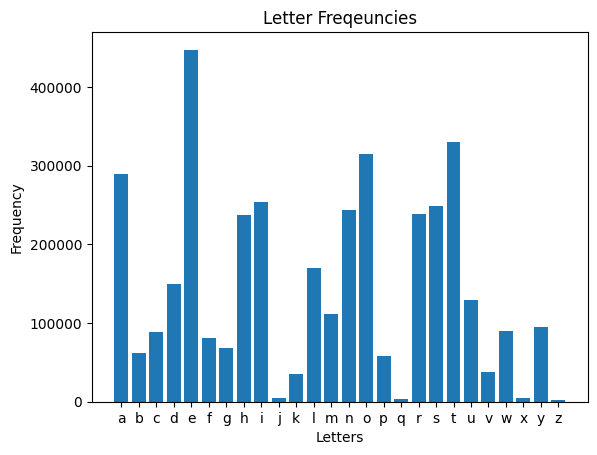

In [104]:
from matplotlib import pyplot

pyplot.title("Letter Freqeuncies")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequency")
x_values: list[str] = shakes_letters_sorted.keys() # my letters
y_values: list[int] = shakes_letters_sorted.values() # my letter counts
pyplot.bar(x_values, y_values)
